# 2. A Hands-On Introduction to the Subject

##### Speed and Memory Bencmarking

## Preparation for Google Collab

In [ ]:
import os
from google.colab import drive

#  挂载 google 云盘
drive.mount("/content/drive")

print(os.getcwd())  # /content

# print(os.listdir("/content/drive/MyDrive/"))

# print(os.listdir("/content/drive/MyDrive/Colab Notebooks"))

# if os.getcwd() != "/content/drive/MyDrive":
#     os.chdir("/content/drive/MyDrive")

# print(os.getcwd())

In [ ]:
# 提前将 requirements.txt 放在 google 云盘上
!pip install -r /content/drive/MyDrive/requirements.txt

In [3]:
subdir = "ch02c"
work_path = "/content/drive/MyDrive/" + subdir
os.mkdir(work_path)
os.chdir(work_path)
print(os.getcwd())

/content/drive/MyDrive/ch02c


In [4]:
!apt-get install tree && tree -a "./"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (40.2 kB/s)
Selecting previously unselected package tree.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
./

0 directories, 0 files


Just comparing language models on their performance on a specific task or a benchmark turns out to be no longer sufficient. We now must take care of the computational cost of a particular model for a given environment (RAM, CPU, GPU, TPU) in terms of memory usage and the speed. The computational cost of training and deploying to production for inference are two main values to be measured. Two classes of transformers libary, `PyTorchBenchmark` and `TensorFlowBenchmark`, make it possible to benchmark models for both TensorFlow and PyTorch.

仅仅比较语言模型在特定任务或基准测试中的性能是不够的. 我们现在必须考虑特定模型在给定环境下(RAM、CPU、GPU、TPU)内存使用和速度方面的计算成本. 训练和部署到生产中进行推理的计算成本是需要测量的两个主要值. transformers 库的两个类 PyTorchBenchmark 和 TensorFlowBenchmark 使得对 TensorFlow 和 PyTorch 的模型进行基准测试成为可能.

In [5]:
!nvidia-smi

Thu Feb 27 02:37:50 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
import torch

print(
    f"The GPU total memory is {torch.cuda.get_device_properties(0).total_memory /(1024**3)} GB"
)

The GPU total memory is 14.74127197265625 GB


In [7]:
from transformers import PyTorchBenchmark, PyTorchBenchmarkArguments

models = ["distilbert-base-uncased", "distilroberta-base", "albert-base-v2"]
batch_sizes = [16]
sequence_lengths = [64, 128, 256, 512]

# help(PyTorchBenchmarkArguments)
args = PyTorchBenchmarkArguments(
    models=models, batch_sizes=batch_sizes, sequence_lengths=sequence_lengths
)
# args = PyTorchBenchmarkArguments(
#     models=models, batch_sizes=batch_sizes, sequence_lengths=sequence_lengths, cuda=False, tpu=False
# )
print("args:", args)
print("args:", args.device)
print("args:", args.device_idx)
print("args:", args.is_gpu)
print("args:", args.is_tpu)
print("args:", args.n_gpu)

benchmark = PyTorchBenchmark(args)
print("benchmark:", benchmark)

/usr/local/lib/python3.11/dist-packages/transformers/benchmark/benchmark_args_utils.py:136: FutureWarning: The class <class 'transformers.benchmark.benchmark_args.PyTorchBenchmarkArguments'> is deprecated. Hugging Face Benchmarking utils are deprecated in general and it is advised to use external Benchmarking libraries  to benchmark Transformer models.
  warnings.warn(


args: PyTorchBenchmarkArguments(models=['distilbert-base-uncased', 'distilroberta-base', 'albert-base-v2'], batch_sizes=[16], sequence_lengths=[64, 128, 256, 512], inference=True, cuda=True, tpu=True, fp16=False, training=False, verbose=False, speed=True, memory=True, trace_memory_line_by_line=False, save_to_csv=False, log_print=False, env_print=False, multi_process=True, inference_time_csv_file='inference_time_1740623907.csv', inference_memory_csv_file='inference_memory_1740623907.csv', train_time_csv_file='train_time_1740623907.csv', train_memory_csv_file='train_memory_1740623907.csv', env_info_csv_file='env_info_1740623907.csv', log_filename='log_1740623907.csv', repeat=3, only_pretrain_model=False, torchscript=False, torch_xla_tpu_print_metrics=False, fp16_opt_level='O1')
args: cuda
args: 0
args: True
args: False
args: 1


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

benchmark: <transformers.benchmark.benchmark.PyTorchBenchmark object at 0x7c89bcdcd650>


/usr/local/lib/python3.11/dist-packages/transformers/benchmark/benchmark_utils.py:614: FutureWarning: The class <class 'transformers.benchmark.benchmark.PyTorchBenchmark'> is deprecated. Hugging Face Benchmarking utils are deprecated in general and it is advised to use external Benchmarking libraries  to benchmark Transformer models.
  warnings.warn(


In [8]:
from transformers import PyTorchBenchmark, PyTorchBenchmarkArguments

models = [
    "bert-base-uncased",
    "distilbert-base-uncased",
    "distilroberta-base",
    "distilbert-base-german-cased",
]
batch_sizes = [4]
sequence_lengths = [32, 64, 128, 256, 512]
args = PyTorchBenchmarkArguments(
    models=models,
    batch_sizes=batch_sizes,
    sequence_lengths=sequence_lengths,
    multi_process=False,
)
print("args:", args)

benchmark = PyTorchBenchmark(args)
print("benchmark:", benchmark)

args: PyTorchBenchmarkArguments(models=['bert-base-uncased', 'distilbert-base-uncased', 'distilroberta-base', 'distilbert-base-german-cased'], batch_sizes=[4], sequence_lengths=[32, 64, 128, 256, 512], inference=True, cuda=True, tpu=True, fp16=False, training=False, verbose=False, speed=True, memory=True, trace_memory_line_by_line=False, save_to_csv=False, log_print=False, env_print=False, multi_process=False, inference_time_csv_file='inference_time_1740623907.csv', inference_memory_csv_file='inference_memory_1740623907.csv', train_time_csv_file='train_time_1740623907.csv', train_memory_csv_file='train_memory_1740623907.csv', env_info_csv_file='env_info_1740623907.csv', log_filename='log_1740623907.csv', repeat=3, only_pretrain_model=False, torchscript=False, torch_xla_tpu_print_metrics=False, fp16_opt_level='O1')


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

benchmark: <transformers.benchmark.benchmark.PyTorchBenchmark object at 0x7c8a55b9ad50>


In [9]:
# it takes time depending on your CPU/GPU capacity and selection
results = benchmark.run()

1 / 4


BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


2 / 4
3 / 4
4 / 4

====================       INFERENCE - SPEED - RESULT       ====================
--------------------------------------------------------------------------------
          Model Name             Batch Size     Seq Length     Time in s   
--------------------------------------------------------------------------------
      bert-base-uncased              4               32             0.01     
      bert-base-uncased              4               64            0.017     
      bert-base-uncased              4              128            0.033     
      bert-base-uncased              4              256            0.064     
      bert-base-uncased              4              512            0.133     
   distilbert-base-uncased           4               32            0.006     
   distilbert-base-uncased           4               64            0.011     
   distilbert-base-uncased           4              128             0.02     
   distilbert-base-uncased           4

In [10]:
results

BenchmarkOutput(time_inference_result={'bert-base-uncased': {'bs': [4], 'ss': [32, 64, 128, 256, 512], 'result': {4: {32: 0.010185504899999387, 64: 0.017108884399999625, 128: 0.03274134239999853, 256: 0.06371487600000023, 512: 0.13287219519999666}}}, 'distilbert-base-uncased': {'bs': [4], 'ss': [32, 64, 128, 256, 512], 'result': {4: {32: 0.006335363900001311, 64: 0.010726936000003207, 128: 0.01978933419999862, 256: 0.03873663960000044, 512: 0.07841959739999993}}}, 'distilroberta-base': {'bs': [4], 'ss': [32, 64, 128, 256, 512], 'result': {4: {32: 0.009075101199999835, 64: 0.012611340600000177, 128: 0.023809352700004636, 256: 0.04735603420000416, 512: 0.09524874749999981}}}, 'distilbert-base-german-cased': {'bs': [4], 'ss': [32, 64, 128, 256, 512], 'result': {4: {32: 0.007650376699996286, 64: 0.011534979200001771, 128: 0.021699008799998865, 256: 0.04018378089999715, 512: 0.08070344569999861}}}}, memory_inference_result={'bert-base-uncased': {'bs': [4], 'ss': [32, 64, 128, 256, 512], 're

In [11]:
results.time_inference_result

{'bert-base-uncased': {'bs': [4],
  'ss': [32, 64, 128, 256, 512],
  'result': {4: {32: 0.010185504899999387,
    64: 0.017108884399999625,
    128: 0.03274134239999853,
    256: 0.06371487600000023,
    512: 0.13287219519999666}}},
 'distilbert-base-uncased': {'bs': [4],
  'ss': [32, 64, 128, 256, 512],
  'result': {4: {32: 0.006335363900001311,
    64: 0.010726936000003207,
    128: 0.01978933419999862,
    256: 0.03873663960000044,
    512: 0.07841959739999993}}},
 'distilroberta-base': {'bs': [4],
  'ss': [32, 64, 128, 256, 512],
  'result': {4: {32: 0.009075101199999835,
    64: 0.012611340600000177,
    128: 0.023809352700004636,
    256: 0.04735603420000416,
    512: 0.09524874749999981}}},
 'distilbert-base-german-cased': {'bs': [4],
  'ss': [32, 64, 128, 256, 512],
  'result': {4: {32: 0.007650376699996286,
    64: 0.011534979200001771,
    128: 0.021699008799998865,
    256: 0.04018378089999715,
    512: 0.08070344569999861}}}}

In [12]:
results.time_inference_result["bert-base-uncased"]

{'bs': [4],
 'ss': [32, 64, 128, 256, 512],
 'result': {4: {32: 0.010185504899999387,
   64: 0.017108884399999625,
   128: 0.03274134239999853,
   256: 0.06371487600000023,
   512: 0.13287219519999666}}}

In [13]:
results.time_inference_result["bert-base-uncased"]["result"]

{4: {32: 0.010185504899999387,
  64: 0.017108884399999625,
  128: 0.03274134239999853,
  256: 0.06371487600000023,
  512: 0.13287219519999666}}

In [14]:
results.time_inference_result["bert-base-uncased"]["result"][4]

{32: 0.010185504899999387,
 64: 0.017108884399999625,
 128: 0.03274134239999853,
 256: 0.06371487600000023,
 512: 0.13287219519999666}

In [15]:
# batch_sizes = [4]
models_perf = [
    list(results.time_inference_result[m]["result"][batch_sizes[0]].values())
    for m in models
]
models_perf

[[0.010185504899999387,
  0.017108884399999625,
  0.03274134239999853,
  0.06371487600000023,
  0.13287219519999666],
 [0.006335363900001311,
  0.010726936000003207,
  0.01978933419999862,
  0.03873663960000044,
  0.07841959739999993],
 [0.009075101199999835,
  0.012611340600000177,
  0.023809352700004636,
  0.04735603420000416,
  0.09524874749999981],
 [0.007650376699996286,
  0.011534979200001771,
  0.021699008799998865,
  0.04018378089999715,
  0.08070344569999861]]

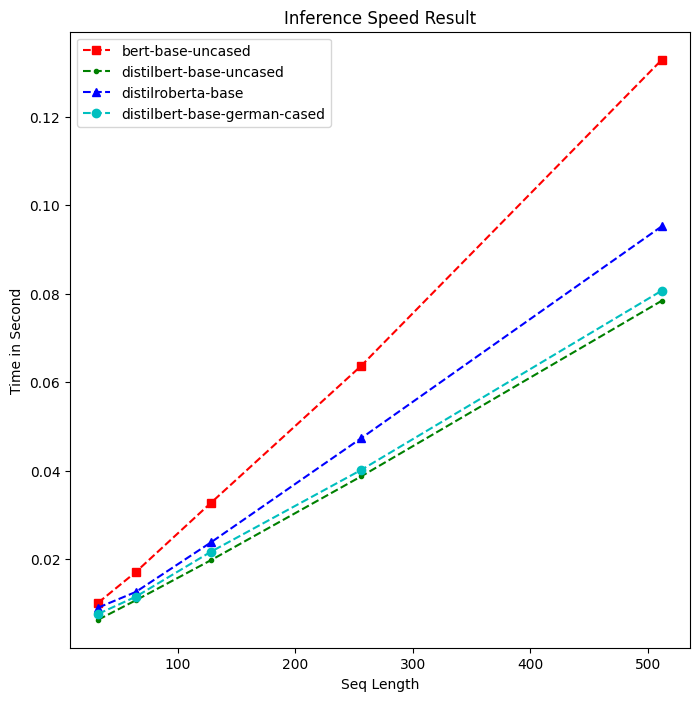

In [16]:
import matplotlib.pyplot as plt

# sequence_lengths = [32, 64, 128, 256, 512]
# batch_sizes = [4]
t = sequence_lengths
models_perf = [
    list(results.time_inference_result[m]["result"][batch_sizes[0]].values())
    for m in models
]

plt.figure(figsize=(8, 8))
plt.plot(
    t,
    models_perf[0],
    "rs--",
    t,
    models_perf[1],
    "g--.",
    t,
    models_perf[2],
    "b--^",
    t,
    models_perf[3],
    "c--o",
)

plt.xlabel("Seq Length")
plt.ylabel("Time in Second")
plt.title("Inference Speed Result")

plt.legend(models)
plt.show()